### Image process and analysis
The code aim to analyize the uniformaty of the image process and selected via Automatic_SampleSelection

In [78]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
class ImageProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image_name = os.path.basename(image_path)
        self.image = cv2.imread(image_path)
        self.rgb_data = self.extract_RGB_data()
        self.df = self.process_image()

    def extract_RGB_data(self):
        # Split RGB channels
        b, g, r = cv2.split(self.image)
        return np.array([r, g, b]).reshape(self.image.shape)

    def rgb_to_wavelength(self, rgb):
        # Normalize RGB values
        normalized_rgb = [val / 255.0 for val in rgb]

        # Calculate the dominant wavelength
        max_val = max(normalized_rgb)
        min_val = min(normalized_rgb)
        wavelength = (max_val - min_val) * 100 + 400

        # Calculate the standard deviation of RGB values
        std_dev = np.std(rgb)

        # Calculate the error in wavelength estimation
        error = std_dev * 100

        return wavelength, error

    def process_image(self):
        # Convert RGB data to wavelength
        wavelengths = []
        errors = []

        for i in range(self.rgb_data.shape[0]):  # Loop over rows
            for j in range(self.rgb_data.shape[1]):
                w, e = self.rgb_to_wavelength(self.rgb_data[i,j,:])
                wavelengths.append(w)
                errors.append(e)

        # Create a dataframe with the wavelength and error data
        df = pd.DataFrame({'Wavelength': wavelengths, 'Error': errors})

        # Plot the wavelength data
        ax = sns.violinplot(x=df['Wavelength'])
        ax.set_title(self.image_name)
        plt.show()
        return df['Wavelength']

In [80]:
class ColorUniformityAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path

    def calculate_color_uniformity(self):
        # Load the image
        image = cv2.imread(self.image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Reshape the image to a flat array
        pixels = image.reshape(-1, 3)

        # Calculate the standard deviation of color values
        std_dev = np.std(pixels, axis=0)

        # Calculate the mean of the standard deviation across color channels
        self.uniformity_score = np.mean(std_dev)

        # Plot the histogram
        self._plot_histogram(pixels)

        print('Color Uniformity Score:', self.uniformity_score)
        return self.uniformity_score

    def _plot_histogram(self, pixels):
        # Extract the file name from the image path
        file_name = os.path.basename(self.image_path)

        # Calculate the histogram
        hist, bins = np.histogram(pixels.flatten(), bins=256, range=[0, 256])

        plt.figure()
        plt.title('Color Histogram - ' + file_name)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.plot(hist, color='gray')
        plt.xlim([0, 256])
        plt.text(10, np.max(hist) - np.max(hist) * 0.1, f'Uniformity Score: {self.uniformity_score:.2f}', fontsize=12, color='black')
        plt.show()

In [81]:
class FolderProcessor:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.overall_data = self.process_images()

    def process_images(self):
        # Iterate over files in the folder
        overall_data = pd.DataFrame()
        for filename in os.listdir(self.folder_path):
            # Check if the file is an image file
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(self.folder_path, filename)
                image_processor = ImageProcessor(image_path)
                overall_data[filename[3:-4]] = image_processor.df

        # Create a larger figure
        plt.figure(figsize=(10, 8))

        # Plot all the data
        ax = sns.violinplot(data=overall_data, inner='stick')
        ax.set(xlabel='Sample', ylabel='Wavelength')
        plt.show()

        return overall_data

In [82]:
class FolderProcessorUniformaty:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.overall_data = self.process_images()

    def process_images(self):
        # Iterate over files in the folder
        overall_data = pd.DataFrame()
        for filename in os.listdir(self.folder_path):
            # Check if the file is an image file
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(self.folder_path, filename)
                # Create an instance of the ColorUniformityAnalyzer class
                analyzer = ColorUniformityAnalyzer(image_path)

                # Call the method to calculate color uniformity
                uniformity_score = analyzer.calculate_color_uniformity()
                print('Color Uniformity Score:', uniformity_score)
                
               



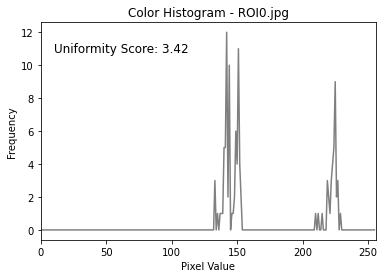

Color Uniformity Score: 3.4167310571062672
Color Uniformity Score: 3.4167310571062672


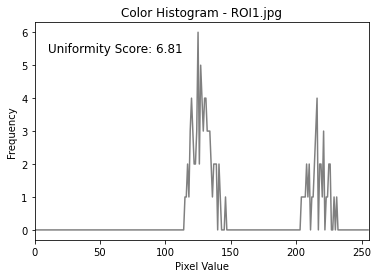

Color Uniformity Score: 6.813921904668498
Color Uniformity Score: 6.813921904668498


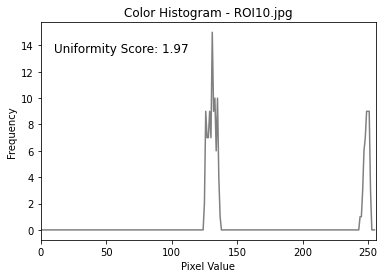

Color Uniformity Score: 1.9678559821968789
Color Uniformity Score: 1.9678559821968789


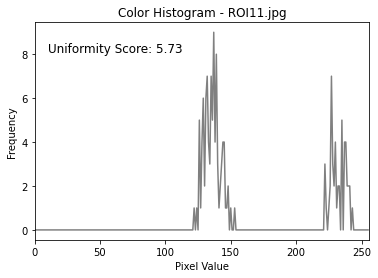

Color Uniformity Score: 5.729692064302118
Color Uniformity Score: 5.729692064302118


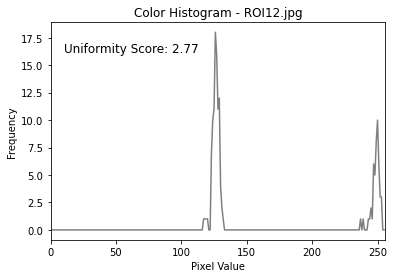

Color Uniformity Score: 2.77204848450905
Color Uniformity Score: 2.77204848450905


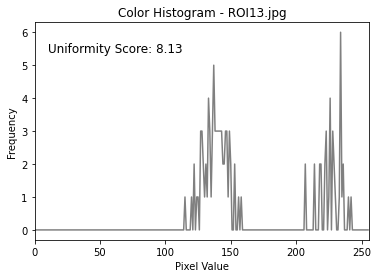

Color Uniformity Score: 8.127078825068509
Color Uniformity Score: 8.127078825068509


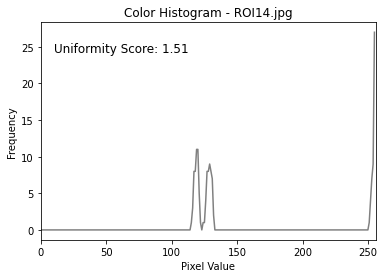

Color Uniformity Score: 1.5081147380833153
Color Uniformity Score: 1.5081147380833153


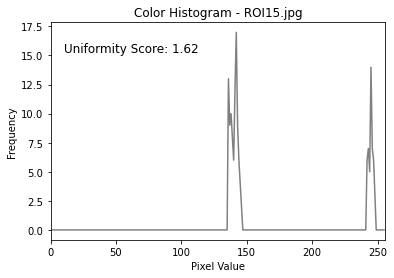

Color Uniformity Score: 1.6241188847558778
Color Uniformity Score: 1.6241188847558778


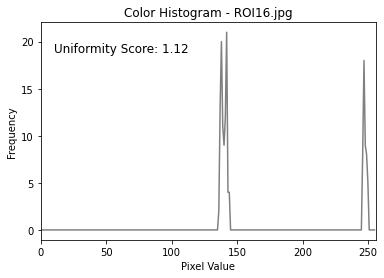

Color Uniformity Score: 1.1233486517191178
Color Uniformity Score: 1.1233486517191178


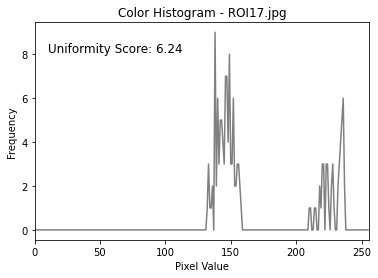

Color Uniformity Score: 6.238047165558768
Color Uniformity Score: 6.238047165558768


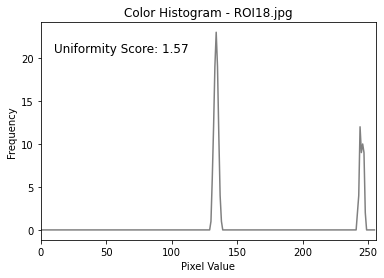

Color Uniformity Score: 1.569453976191058
Color Uniformity Score: 1.569453976191058


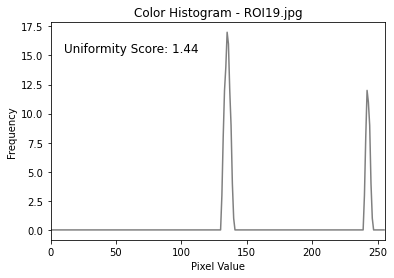

Color Uniformity Score: 1.4359895446075583
Color Uniformity Score: 1.4359895446075583


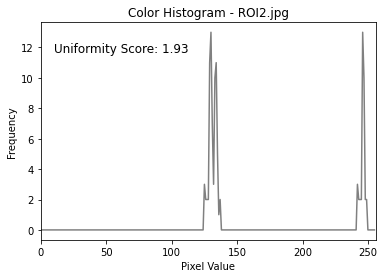

Color Uniformity Score: 1.9303590300810718
Color Uniformity Score: 1.9303590300810718


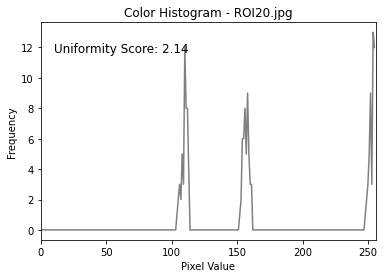

Color Uniformity Score: 2.144727139007927
Color Uniformity Score: 2.144727139007927


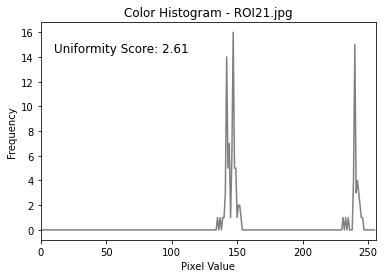

Color Uniformity Score: 2.61278092019774
Color Uniformity Score: 2.61278092019774


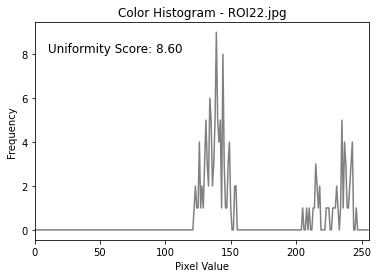

Color Uniformity Score: 8.600777994898609
Color Uniformity Score: 8.600777994898609


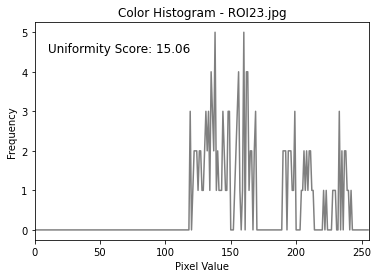

Color Uniformity Score: 15.058128627910094
Color Uniformity Score: 15.058128627910094


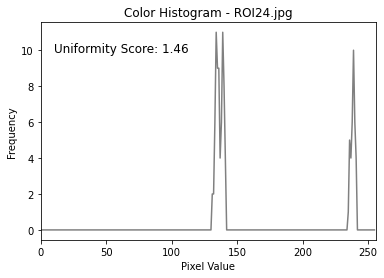

Color Uniformity Score: 1.4571344279762126
Color Uniformity Score: 1.4571344279762126


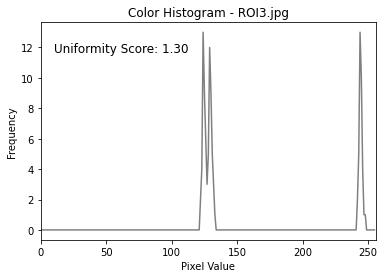

Color Uniformity Score: 1.303477400335521
Color Uniformity Score: 1.303477400335521


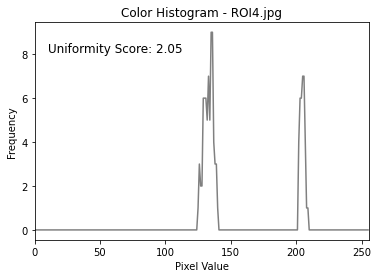

Color Uniformity Score: 2.0544441659138424
Color Uniformity Score: 2.0544441659138424


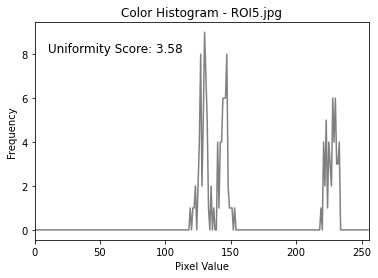

Color Uniformity Score: 3.5771351420053996
Color Uniformity Score: 3.5771351420053996


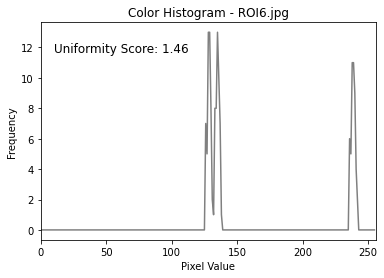

Color Uniformity Score: 1.4623975373388511
Color Uniformity Score: 1.4623975373388511


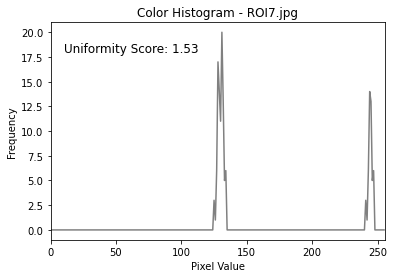

Color Uniformity Score: 1.527525231651947
Color Uniformity Score: 1.527525231651947


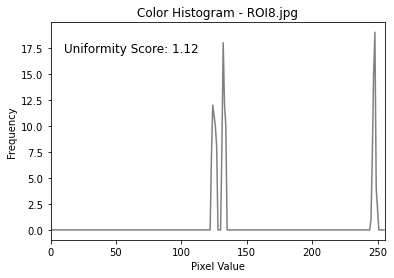

Color Uniformity Score: 1.1159550871709698
Color Uniformity Score: 1.1159550871709698


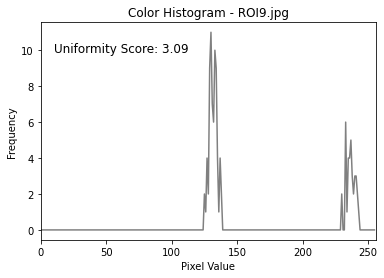

Color Uniformity Score: 3.0927190988189452
Color Uniformity Score: 3.0927190988189452


In [83]:
# Example usage
folder_path = "C:/Users/james/Desktop/Surface plasma/Oil_water_1/ROIs_1"
folder_processor = FolderProcessorUniformaty(folder_path)


The code demonstrates how to quantify image color uniformity using histogram analysis. It follows an object-oriented programming (OOP) approach and consists of a `ColorUniformityAnalyzer` class.

### ColorUniformityAnalyzer Class
The `ColorUniformityAnalyzer` class encapsulates the functionality to analyze color uniformity in an image.

#### Constructor
The class constructor `__init__(self, image_path)` initializes the `ColorUniformityAnalyzer` object. It takes an `image_path` parameter, which should be the path to the image file.

#### calculate_color_uniformity()
The `calculate_color_uniformity()` method calculates the color uniformity of the image. It loads the image, converts it to RGB color space, computes the histogram for each color channel, combines the histograms, normalizes them, and calculates the uniformity metric. It also calls the `_plot_histogram()` method to visualize the histogram.

#### _plot_histogram()
The `_plot_histogram(self, hist_normalized)` method is a private method that plots the color histogram of the image. It receives the normalized histogram as input and uses matplotlib to create a histogram plot.

### Example Usage
To use the code, follow these steps:

1. Provide the path to your image file by replacing `'path/to/your/image.jpg'` with the actual image file path.
2. Create an instance of the `ColorUniformityAnalyzer` class, passing the image path as a parameter.
3. Call the `calculate_color_uniformity()` method on the created instance to calculate the color uniformity score.
4. The color uniformity score will be printed as the output.

Make sure to have the necessary libraries installed, such as OpenCV (`cv2`), NumPy (`np`), and Matplotlib (`plt`).